In [8]:
%matplotlib inline


# Remove line noise with ZapLine

Find a spatial filter to get rid of line noise [1]_.

Uses meegkit.dss_line().

## References
.. [1] de Cheveigné, A. (2019). ZapLine: A simple and effective method to remove
   power line artifacts. NeuroImage, 116356.
   https://doi.org/10.1016/j.neuroimage.2019.116356


In [1]:
# Authors: Maciej Szul <maciej.szul@isc.cnrs.fr>
#          Nicolas Barascud <nicolas.barascud@gmail.com>
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from meegkit import dss
from meegkit.utils import create_line_data, unfold

# Line noise removal



## Remove line noise with dss_line()
We first generate some noisy data to work with



In [2]:
sfreq = 250
fline = 50
nsamples = 10000
nchans = 10
data = create_line_data(n_samples=3 * nsamples, n_chans=nchans,
                        n_trials=1, fline=fline / sfreq, SNR=2)[0]
data = data[..., 0]  # only take first trial

# Apply dss_line (ZapLine)
out, _ = dss.dss_line(data, fline, sfreq, nkeep=1)

[PCA] Explained variance of selected components : 85.44%
Power of components removed by DSS: 0.82


Plot before/after



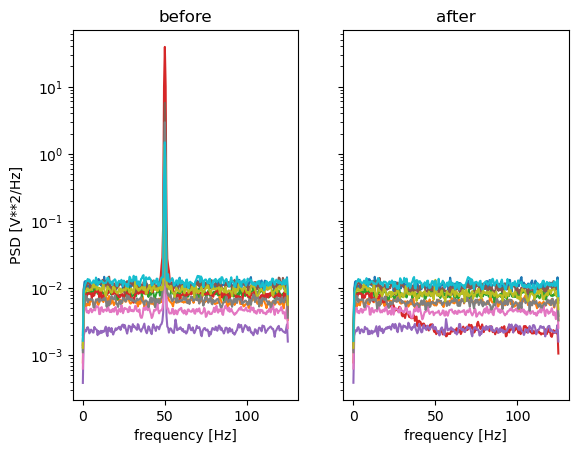

In [3]:
f, ax = plt.subplots(1, 2, sharey=True)
f, Pxx = signal.welch(data, sfreq, nperseg=500, axis=0, return_onesided=True)
ax[0].semilogy(f, Pxx)
f, Pxx = signal.welch(out, sfreq, nperseg=500, axis=0, return_onesided=True)
ax[1].semilogy(f, Pxx)
ax[0].set_xlabel("frequency [Hz]")
ax[1].set_xlabel("frequency [Hz]")
ax[0].set_ylabel("PSD [V**2/Hz]")
ax[0].set_title("before")
ax[1].set_title("after")
plt.show()

## Remove line noise with dss_line_iter()
We first load some noisy data to work with



(400, 64, 267)


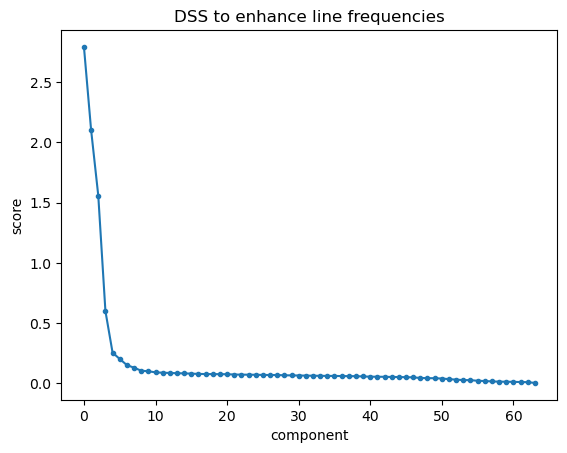

Power of components removed by DSS: 0.00


In [4]:
data = np.load(os.path.join("..", "tests", "data", "dss_line_data.npy"))
fline = 50
sfreq = 200
print(data.shape)  # n_samples, n_chans, n_trials

# Apply dss_line(), removing only one component
out1, _ = dss.dss_line(data, fline, sfreq, nremove=1, nfft=400, show=True)

Now try dss_line_iter(). This applies dss_line() repeatedly until the
artifact is gone



In [ ]:
out2, iterations = dss.dss_line_iter(data, fline, sfreq, nfft=400, show=True)
print(f"Removed {iterations} components")

Power of components removed by DSS: 0.00
Iteration 0 score: 8.82279465645174e-30
Power of components removed by DSS: 0.00
Iteration 1 score: 5.459918440184621e-30
Power of components removed by DSS: 0.00
Iteration 2 score: 1.859706167765309e-31
Power of components removed by DSS: 0.00
Iteration 3 score: -2.861571467810889e-31
Removed 3 components


Plot results with dss_line() vs. dss_line_iter()



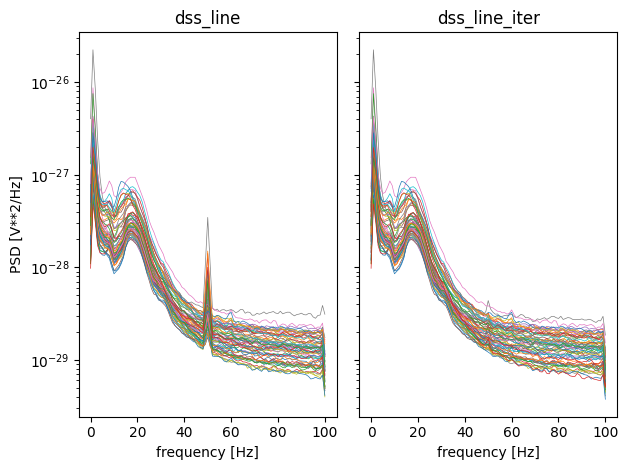

In [7]:
f, ax = plt.subplots(1, 2, sharey=True)
f, Pxx = signal.welch(unfold(out1), sfreq, nperseg=200, axis=0,
                      return_onesided=True)
ax[0].semilogy(f, Pxx, lw=.5)
f, Pxx = signal.welch(unfold(out2), sfreq, nperseg=200, axis=0,
                      return_onesided=True)
ax[1].semilogy(f, Pxx, lw=.5)
ax[0].set_xlabel("frequency [Hz]")
ax[1].set_xlabel("frequency [Hz]")
ax[0].set_ylabel("PSD [V**2/Hz]")
ax[0].set_title("dss_line")
ax[1].set_title("dss_line_iter")
plt.tight_layout()
plt.show()